**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series

In [2]:
import warnings
warnings.filterwarnings("ignore")

**Data Ingestion**

* Train Dataset : Count of Passengers commutted at a given hour
* Test Dataset  : 7 Months Time Period for which predictions need to be made

In [3]:
train_original=pd.read_csv("Train.csv",parse_dates=['Datetime'],dayfirst=True)
test_original=pd.read_csv("Test.csv",parse_dates=['Datetime'],dayfirst=True)

In [4]:
train_original

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [5]:
test_original

,ID,Datetime
0,18288,2014-09-26 00:00:00
1,18289,2014-09-26 01:00:00
2,18290,2014-09-26 02:00:00
3,18291,2014-09-26 03:00:00
4,18292,2014-09-26 04:00:00
...,...,...
5107,23395,2015-04-26 19:00:00
5108,23396,2015-04-26 20:00:00
5109,23397,2015-04-26 21:00:00
5110,23398,2015-04-26 22:00:00


In [9]:
data=train_original.copy()

In [10]:
data.set_index('Datetime',inplace=True)
data

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2
...,...,...
2014-09-25 19:00:00,18283,868
2014-09-25 20:00:00,18284,732
2014-09-25 21:00:00,18285,702


In [11]:
data.drop('ID',axis=1,inplace=True)
data

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


# <center> Approach - 1 [Machine Learning]

# Task One: Time Series Visualization and Explanatory Analysis

**Hypothesis Generation** 
* 1. There will be an increase in the traffic as the years pass by.
Explanation - Population has a general upward trend with time, so I can expect more
people to travel by JetRail. Also, generally companies expand their businesses over time
leading to more customers travelling through JetRail.
* 2. The trafc will be high from May to October.
Explanation - Tourist visits generally increases during this time perion.
* 3. Trafc on weekdays will be more as compared to weekends/holidays.
Explanation - People will go to ofce on weekdays and hence the trafc will be more
* 4. Trafc during the peak hours will be high.
Explanation - People will travel to work, college.

In [14]:
data['Year']=data.index.year
data['Month']=data.index.month
data['Day']=data.index.day
data['Hour']=data.index.hour
data['dayOfWeek']=data.index.dayofweek
data['is_weekend'] = data.index.weekday.isin([5,6])*1
data

,Count,Year,Month,Day,Hour,dayOfWeek,is_weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,702,2014,9,25,21,3,0


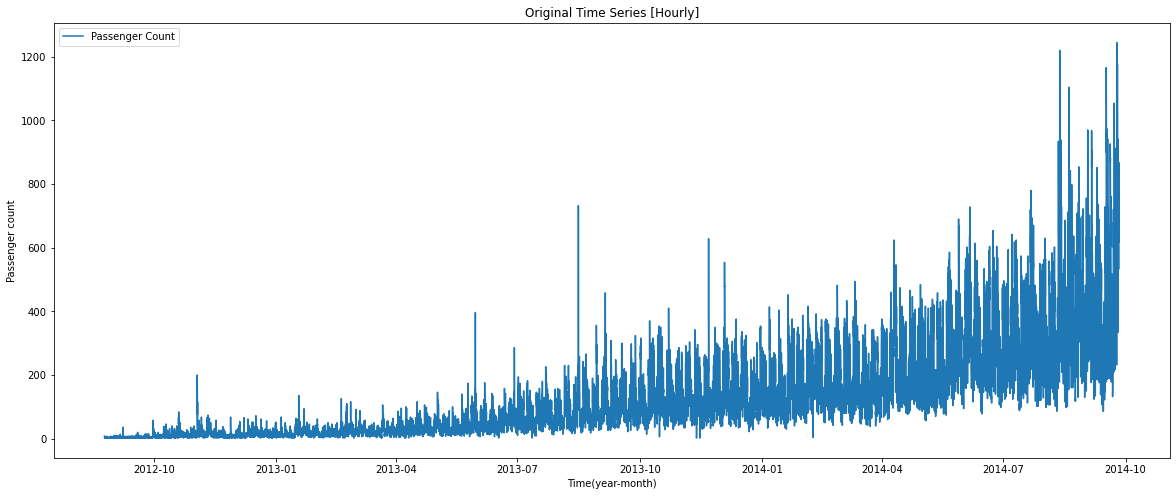

In [15]:
plt.figure(figsize=(20,8))
plt.plot(data['Count'], label='Passenger Count')
plt.title('Original Time Series [Hourly]')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best');

In [16]:
data

,Count,Year,Month,Day,Hour,dayOfWeek,is_weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...
2014-09-25 19:00:00,868,2014,9,25,19,3,0
2014-09-25 20:00:00,732,2014,9,25,20,3,0
2014-09-25 21:00:00,702,2014,9,25,21,3,0


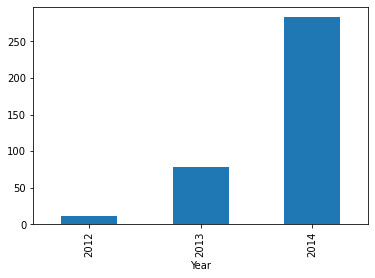

In [17]:
data.groupby('Year')['Count'].mean().plot.bar();

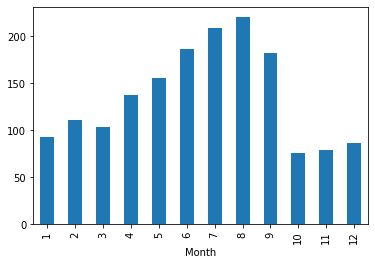

In [18]:
data.groupby('Month')['Count'].mean().plot.bar();

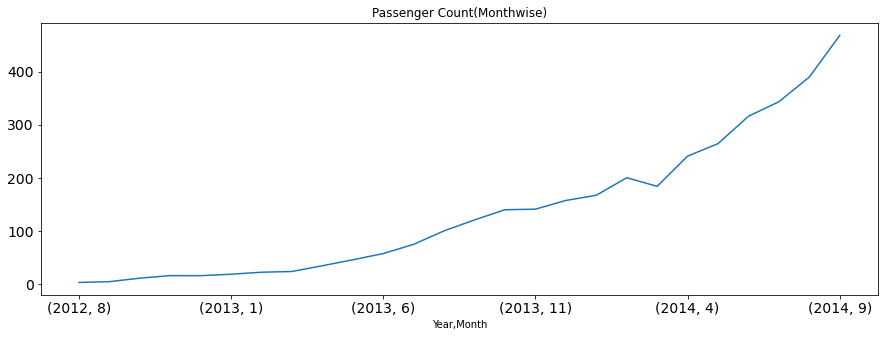

In [19]:
temp=data.groupby(['Year', 'Month'])['Count'].mean()
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14);

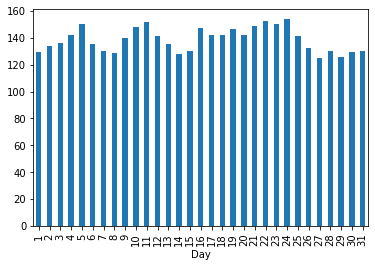

In [20]:
data.groupby('Day')['Count'].mean().plot.bar();

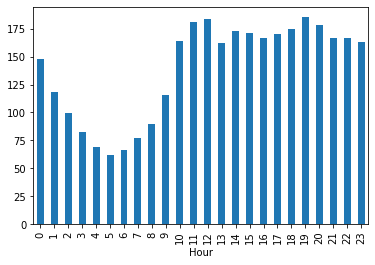

In [21]:
data.groupby('Hour')['Count'].mean().plot.bar();

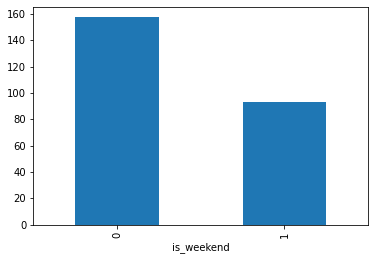

In [22]:
data.groupby('is_weekend')['Count'].mean().plot.bar();


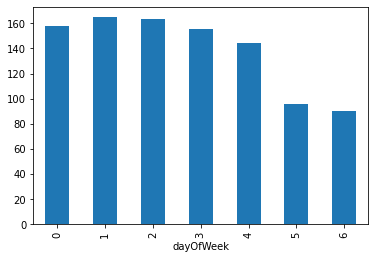

In [23]:
data.groupby('dayOfWeek')['Count'].mean().plot.bar();

## Determine the Granularity of Predicitions

In [24]:
# Hourly time series [Original]
hourly = data.resample('H').mean()
# Converting to daily mean
daily = data.resample('D').mean()
# Converting to weekly mean
weekly = data.resample('W').mean()
# Converting to monthly mean
monthly = data.resample('M').mean()

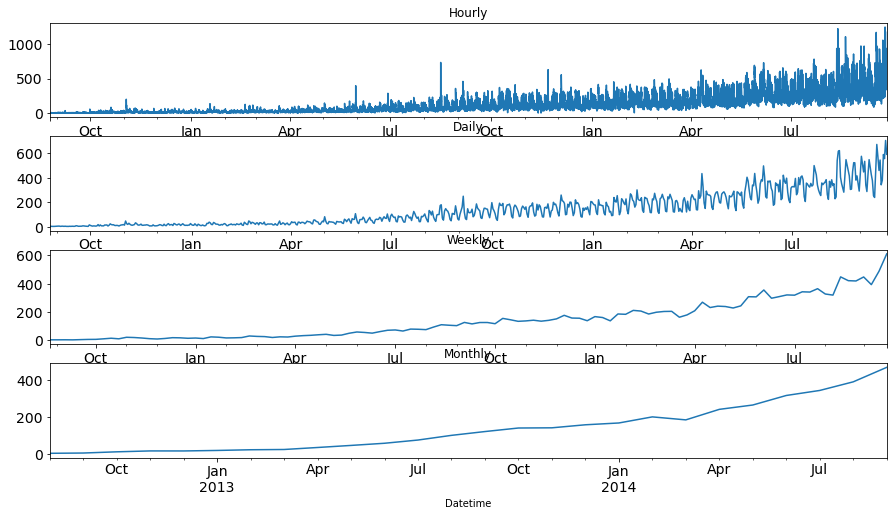

In [25]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]);

In [26]:
data_daily=pd.DataFrame(data.resample('D').mean()['Count']).round(0)
data_daily

,Count
Datetime,
2012-08-25,3.0
2012-08-26,4.0
2012-08-27,3.0
2012-08-28,2.0
2012-08-29,2.0
...,...
2014-09-21,379.0
2014-09-22,588.0
2014-09-23,554.0


## Validation Strategy

In [27]:
print(data_daily.index.min())
print(data_daily.index.max())

2012-08-25 00:00:00
2014-09-25 00:00:00


In [28]:
import datetime as dt
ref_dt1 = dt.datetime(2014,7,24)
print(ref_dt1)

2014-07-24 00:00:00


In [29]:
train=data_daily.loc[:ref_dt1]
train

,Count
Datetime,
2012-08-25,3.0
2012-08-26,4.0
2012-08-27,3.0
2012-08-28,2.0
2012-08-29,2.0
...,...
2014-07-20,341.0
2014-07-21,498.0
2014-07-22,459.0


In [30]:
ref_dt2 = dt.datetime(2014,7,25)
print(ref_dt2)

2014-07-25 00:00:00


In [31]:
valid=data_daily.loc[ref_dt2:]
valid

,Count
Datetime,
2014-07-25,300.0
2014-07-26,273.0
2014-07-27,254.0
2014-07-28,356.0
2014-07-29,342.0
...,...
2014-09-21,379.0
2014-09-22,588.0
2014-09-23,554.0


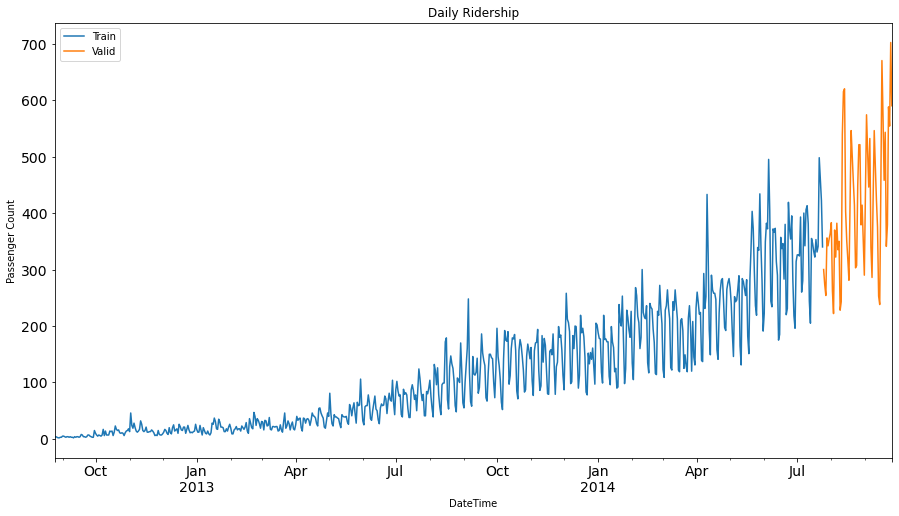

In [32]:
train.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='Train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='Valid')
plt.xlabel('DateTime')
plt.ylabel('Passenger Count')
plt.legend(loc='best')
plt.show();

In [33]:
# Creating a copy of the initial datagrame to make various transformations 
train_data_ml = train.copy()
train_data_ml

,Count
Datetime,
2012-08-25,3.0
2012-08-26,4.0
2012-08-27,3.0
2012-08-28,2.0
2012-08-29,2.0
...,...
2014-07-20,341.0
2014-07-21,498.0
2014-07-22,459.0


In [34]:
train_data_ml['Year']=train_data_ml.index.year
train_data_ml['Month']=train_data_ml.index.month
train_data_ml['Day']=train_data_ml.index.day
train_data_ml['Hour']=train_data_ml.index.hour
train_data_ml['dayOfWeek']=train_data_ml.index.dayofweek
train_data_ml['is_weekend'] = train_data_ml.index.weekday.isin([5,6])*1
train_data_ml

,Count,Year,Month,Day,Hour,dayOfWeek,is_weekend
Datetime,,,,,,,
2012-08-25,3.0,2012,8,25,0,5,1
2012-08-26,4.0,2012,8,26,0,6,1
2012-08-27,3.0,2012,8,27,0,0,0
2012-08-28,2.0,2012,8,28,0,1,0
2012-08-29,2.0,2012,8,29,0,2,0
...,...,...,...,...,...,...,...
2014-07-20,341.0,2014,7,20,0,6,1
2014-07-21,498.0,2014,7,21,0,0,0
2014-07-22,459.0,2014,7,22,0,1,0


In [35]:
train_data_ml['dayNum']=range(len(train_data_ml))
train_data_ml

,Count,Year,Month,Day,Hour,dayOfWeek,is_weekend,dayNum
Datetime,,,,,,,,
2012-08-25,3.0,2012,8,25,0,5,1,0
2012-08-26,4.0,2012,8,26,0,6,1,1
2012-08-27,3.0,2012,8,27,0,0,0,2
2012-08-28,2.0,2012,8,28,0,1,0,3
2012-08-29,2.0,2012,8,29,0,2,0,4
...,...,...,...,...,...,...,...,...
2014-07-20,341.0,2014,7,20,0,6,1,694
2014-07-21,498.0,2014,7,21,0,0,0,695
2014-07-22,459.0,2014,7,22,0,1,0,696


In [36]:
# Creating a copy of the initial datagrame to make various transformations 
valid_data_ml = valid.copy()
valid_data_ml

,Count
Datetime,
2014-07-25,300.0
2014-07-26,273.0
2014-07-27,254.0
2014-07-28,356.0
2014-07-29,342.0
...,...
2014-09-21,379.0
2014-09-22,588.0
2014-09-23,554.0


In [37]:
valid_data_ml['Year']=valid_data_ml.index.year
valid_data_ml['Month']=valid_data_ml.index.month
valid_data_ml['Day']=valid_data_ml.index.day
valid_data_ml['Hour']=valid_data_ml.index.hour
valid_data_ml['dayOfWeek']=valid_data_ml.index.dayofweek
valid_data_ml['is_weekend'] = valid_data_ml.index.weekday.isin([5,6])*1
valid_data_ml

,Count,Year,Month,Day,Hour,dayOfWeek,is_weekend
Datetime,,,,,,,
2014-07-25,300.0,2014,7,25,0,4,0
2014-07-26,273.0,2014,7,26,0,5,1
2014-07-27,254.0,2014,7,27,0,6,1
2014-07-28,356.0,2014,7,28,0,0,0
2014-07-29,342.0,2014,7,29,0,1,0
...,...,...,...,...,...,...,...
2014-09-21,379.0,2014,9,21,0,6,1
2014-09-22,588.0,2014,9,22,0,0,0
2014-09-23,554.0,2014,9,23,0,1,0


In [38]:
valid_data_ml['dayNum']=range(len(train_data_ml), len(valid_data_ml) +len(train_data_ml))
valid_data_ml

,Count,Year,Month,Day,Hour,dayOfWeek,is_weekend,dayNum
Datetime,,,,,,,,
2014-07-25,300.0,2014,7,25,0,4,0,699
2014-07-26,273.0,2014,7,26,0,5,1,700
2014-07-27,254.0,2014,7,27,0,6,1,701
2014-07-28,356.0,2014,7,28,0,0,0,702
2014-07-29,342.0,2014,7,29,0,1,0,703
...,...,...,...,...,...,...,...,...
2014-09-21,379.0,2014,9,21,0,6,1,757
2014-09-22,588.0,2014,9,22,0,0,0,758
2014-09-23,554.0,2014,9,23,0,1,0,759


In [39]:
X_train=train_data_ml.drop(['Count'],axis=1)
y_train=train_data_ml['Count']

X_valid=valid_data_ml.drop(['Count'],axis=1)
y_valid=valid_data_ml['Count']

In [40]:
(X_train.shape),(y_train.shape),(X_valid.shape),(y_valid.shape)

((699, 7), (699,), (63, 7), (63,))

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [42]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
lr.coef_

array([-1.16509567e+03, -9.47254081e+01, -3.39522100e+00, -9.59232693e-14,
       -2.51148191e+00, -4.38102198e+01,  3.67493041e+00])

In [44]:
lr_pred=lr.predict(X_train)
lr_pred[:5]

array([-89.27194144, -91.50371395, -32.34489329, -34.5766658 ,
       -36.80843831])

In [45]:
# RMSE - Train
mean_squared_error(y_train, lr.predict(X_train),squared=False)

41.919004408375464

In [46]:
# RMSE - Valid
mean_squared_error(y_valid, lr.predict(X_valid),squared=False)

147.52392394170184

In [47]:
from xgboost import XGBRegressor 

In [48]:
xgb = XGBRegressor(learning_rate=.85,max_depth=3,n_estimators=29,random_state=23)

In [49]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.85, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=29, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=23,
             reg_alpha=0, reg_lambda=1, ...)

In [50]:
# RMSE - Train
mean_squared_error(y_train, xgb.predict(X_train),squared=False)

12.49306865150442

In [51]:
# RMSE - Valid
mean_squared_error(y_valid, xgb.predict(X_valid),squared=False)

102.72622364909424

## <center> Lag Variables

In [52]:
Original_data=data_daily.copy()
Original_data

,Count
Datetime,
2012-08-25,3.0
2012-08-26,4.0
2012-08-27,3.0
2012-08-28,2.0
2012-08-29,2.0
...,...
2014-09-21,379.0
2014-09-22,588.0
2014-09-23,554.0


In [53]:
# Adding the lag of the target variable from T1 steps back up to T2
for i in range(60,61,1):
    Original_data["lag_{}".format(i)] = Original_data.Count.shift(i)

In [54]:
Original_data

,Count,lag_60
Datetime,,
2012-08-25,3.0,NaN
2012-08-26,4.0,NaN
2012-08-27,3.0,NaN
2012-08-28,2.0,NaN
2012-08-29,2.0,NaN
...,...,...
2014-09-21,379.0,422.0
2014-09-22,588.0,340.0
2014-09-23,554.0,300.0


In [55]:
train_data_ml2=pd.merge(train_data_ml, Original_data['lag_60'], left_index=True, right_index=True)
train_data_ml2

,Count,Year,Month,Day,Hour,dayOfWeek,is_weekend,dayNum,lag_60
Datetime,,,,,,,,,
2012-08-25,3.0,2012,8,25,0,5,1,0,NaN
2012-08-26,4.0,2012,8,26,0,6,1,1,NaN
2012-08-27,3.0,2012,8,27,0,0,0,2,NaN
2012-08-28,2.0,2012,8,28,0,1,0,3,NaN
2012-08-29,2.0,2012,8,29,0,2,0,4,NaN
...,...,...,...,...,...,...,...,...,...
2014-07-20,341.0,2014,7,20,0,6,1,694,403.0
2014-07-21,498.0,2014,7,21,0,0,0,695,372.0
2014-07-22,459.0,2014,7,22,0,1,0,696,297.0


In [56]:
train_data_ml2.isnull().sum()

Count          0
Year           0
Month          0
Day            0
Hour           0
dayOfWeek      0
is_weekend     0
dayNum         0
lag_60        60
dtype: int64

In [57]:
train_data_ml2=train_data_ml2.dropna()

In [58]:
X_train=train_data_ml2.drop(['Count'],axis=1)
y_train=train_data_ml2['Count']

In [59]:
X_valid=pd.merge(X_valid, Original_data['lag_60'], left_index=True, right_index=True)
X_valid

,Year,Month,Day,Hour,dayOfWeek,is_weekend,dayNum,lag_60
Datetime,,,,,,,,
2014-07-25,2014,7,25,0,4,0,699,339.0
2014-07-26,2014,7,26,0,5,1,700,334.0
2014-07-27,2014,7,27,0,6,1,701,434.0
2014-07-28,2014,7,28,0,0,0,702,342.0
2014-07-29,2014,7,29,0,1,0,703,280.0
...,...,...,...,...,...,...,...,...
2014-09-21,2014,9,21,0,6,1,757,422.0
2014-09-22,2014,9,22,0,0,0,758,340.0
2014-09-23,2014,9,23,0,1,0,759,300.0


In [60]:
X_valid.isnull().sum()

Year          0
Month         0
Day           0
Hour          0
dayOfWeek     0
is_weekend    0
dayNum        0
lag_60        0
dtype: int64

In [61]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [62]:
# RMSE - Train
mean_squared_error(y_train, lr.predict(X_train),squared=False)

39.91848588586461

In [63]:
# RMSE - Valid
mean_squared_error(y_valid, lr.predict(X_valid),squared=False)

132.79986077056526

In [64]:
xgb = XGBRegressor(learning_rate=.85,max_depth=3,n_estimators=109,random_state=23)

In [65]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.85, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=109, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=23,
             reg_alpha=0, reg_lambda=1, ...)

In [66]:
# RMSE - Train
mean_squared_error(y_train, xgb.predict(X_train),squared=False)

3.7309951139060678

In [67]:
# RMSE - Valid
mean_squared_error(y_valid, xgb.predict(X_valid),squared=False)

100.66692452996062

## Reference Links 

* 7 methods to perform Time Series forecasting - https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/
* 40 Questions to test a data scientist on Time Series - https://www.analyticsvidhya.com/blog/2017/04/40-questions-on-time-series-solution-skillpower-time-series-datafest-2017/
* Time Series Forecasting using Python [Free Course] - https://courses.analyticsvidhya.com/courses/take/creating-time-series-forecast-using-python/texts/10561479-introduction-to-the-course
